In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

In [5]:
df.shape

(1000, 8)

### 3. Data Checks to perform
##### Check Missing values
##### Check Duplicates
##### Check data type
##### Check the number of unique values of each column
##### Check statistics of data set
##### Check various categories present in the different categorical column

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Observation
There is no missing value in any column

In [12]:
df.duplicated().sum()

0

#### Observation
There is no duplicate value in data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [41]:
def unique_cols(cols, df, exclude_cols=[]):
    unique_val_col = {}
    for col in cols:
        if col not in exclude_cols:
            unique_val_col[col] = df[col].unique()
    for col, unique_val in unique_val_col.items():
        print(f"Unique values for column '{col}':")
        for val in unique_val:
            print(val)
        print("\n")
cols = df.columns
exclude_cols = ['reading_score', 'writing_score', 'math_score']
unique_cols(cols,df, exclude_cols)

Unique values for column 'gender':
female
male


Unique values for column 'race_ethnicity':
group B
group C
group A
group D
group E


Unique values for column 'parental_level_of_education':
bachelor's degree
some college
master's degree
associate's degree
high school
some high school


Unique values for column 'lunch':
standard
free/reduced


Unique values for column 'test_preparation_course':
none
completed




In [36]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Observation
1. All the description of numerical value mean is in between 66.08 to 69.16
2. All standard deviation is close to 14.60 to 15.19
3. minimum value observed in each respective column.
- For the "math_score" column, the minimum score observed is 0.
- For the "reading_score" column, the minimum score observed is 17.
- For the "writing_score" column, the minimum score observed is 10.

In [44]:
categorical_cols = [feature for feature in df.columns if not df[feature].eq('0').all()]
print("Number of categorical_cols in data",len(categorical_cols))
categorical_cols

Number of categorical_cols in data 8


['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [51]:
numerical_cols = [feature for feature in df.columns if df[feature].dtype in ['int64','int32', 'float64']]
print("Number of numerical_cols in data",len(numerical_cols))
numerical_cols

Number of numerical_cols in data 3


['math_score', 'reading_score', 'writing_score']

#### Adding columns for "Total Score" and "Average"

In [52]:
df['Total Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['Total Score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [59]:
total_math_score = df[df['math_score'] == 100]['Average'].count()
total_reading_score = df[df['reading_score'] == 100]['Average'].count()
total_writing_score = df[df['writing_score'] == 100]['Average'].count()

print(f"Number of students who get full marks in math: {total_math_score}")
print(f"Number of students who get full marks in reading: {total_reading_score}")
print(f"Number of students who get full marks in writing: {total_writing_score}")

Number of students who get full marks in math: 7
Number of students who get full marks in reading: 17
Number of students who get full marks in writing: 14


In [60]:
math_less_20 = df[df['math_score'] <= 20]['Average'].count()
reading_less_20 = df[df['reading_score'] <= 20]['Average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['Average'].count()

print(f"Number of students who get less then 20 marks in math: {math_less_20}")
print(f"Number of students who get less then 20 marks in reading: {reading_less_20}")
print(f"Number of students who get less then 20 marks in writing: {writing_less_20}")

Number of students who get less then 20 marks in math: 4
Number of students who get less then 20 marks in reading: 1
Number of students who get less then 20 marks in writing: 3


### Observation
##### From above data we get students performed worst in math
##### best perform is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion.
##### - Histogram
##### - Kernel Distribution Function (KDE)

<Axes: xlabel='Total Score', ylabel='Count'>

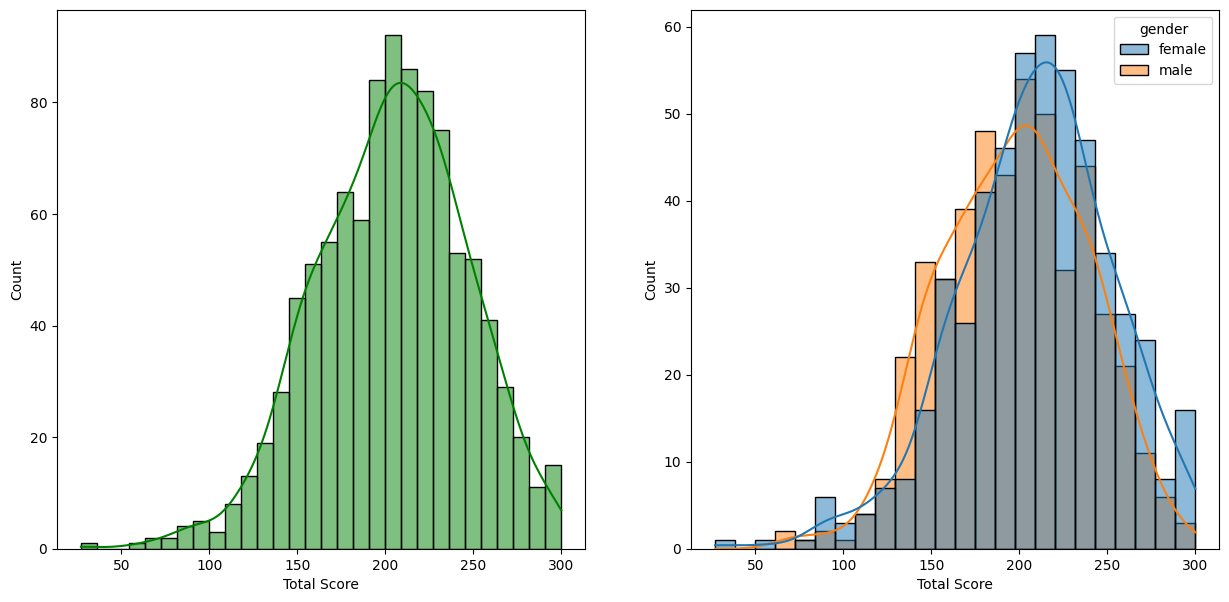

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Total Score', bins=30, kde=True,  color='g')
plt.subplot(122)
sns.histplot(data=df, x='Total Score', kde=True, hue='gender')

<Axes: xlabel='Average', ylabel='Count'>

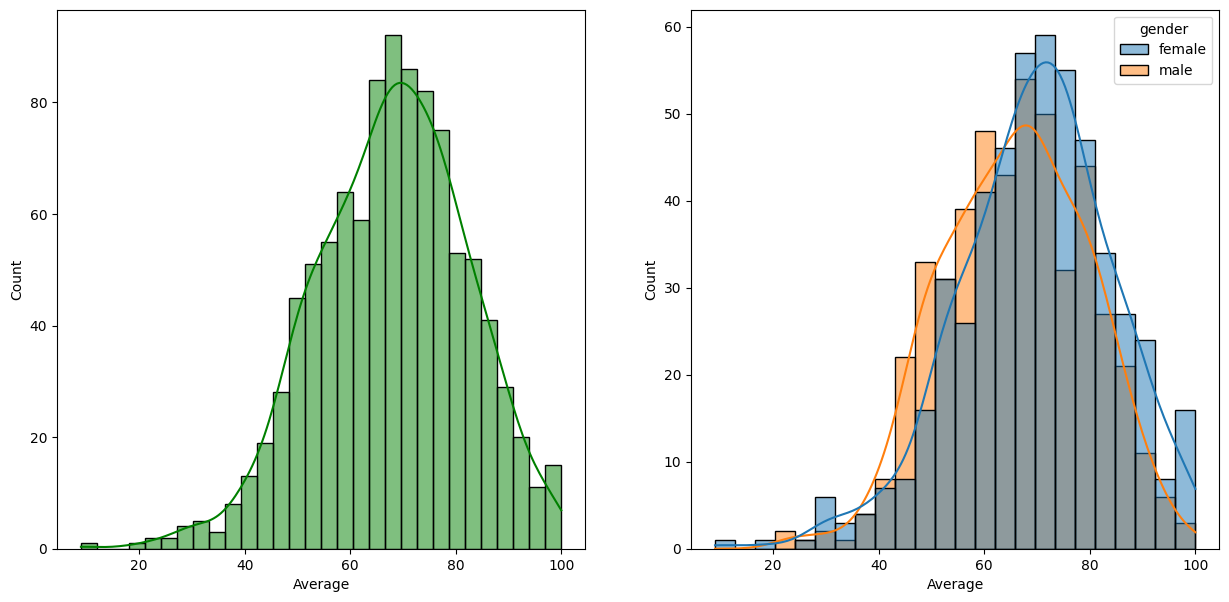

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True,  color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average', kde=True, hue='gender')

#### Female Students tend to perform well incomparision of male

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7256\771674380.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7256\771674380.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7256\771674380.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


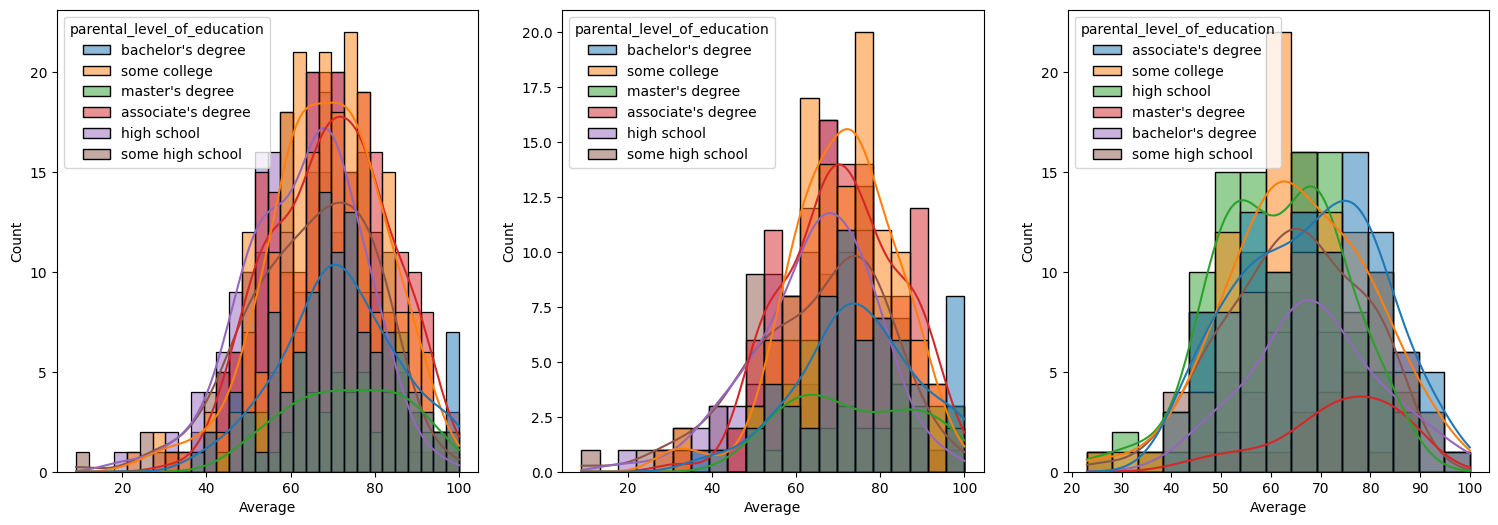

In [92]:
fig, ax = plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average', bins=30, kde=True,  hue="parental_level_of_education")
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='Average', kde=True, hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='Average', kde=True, hue='parental_level_of_education')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7256\404186961.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7256\404186961.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7256\404186961.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


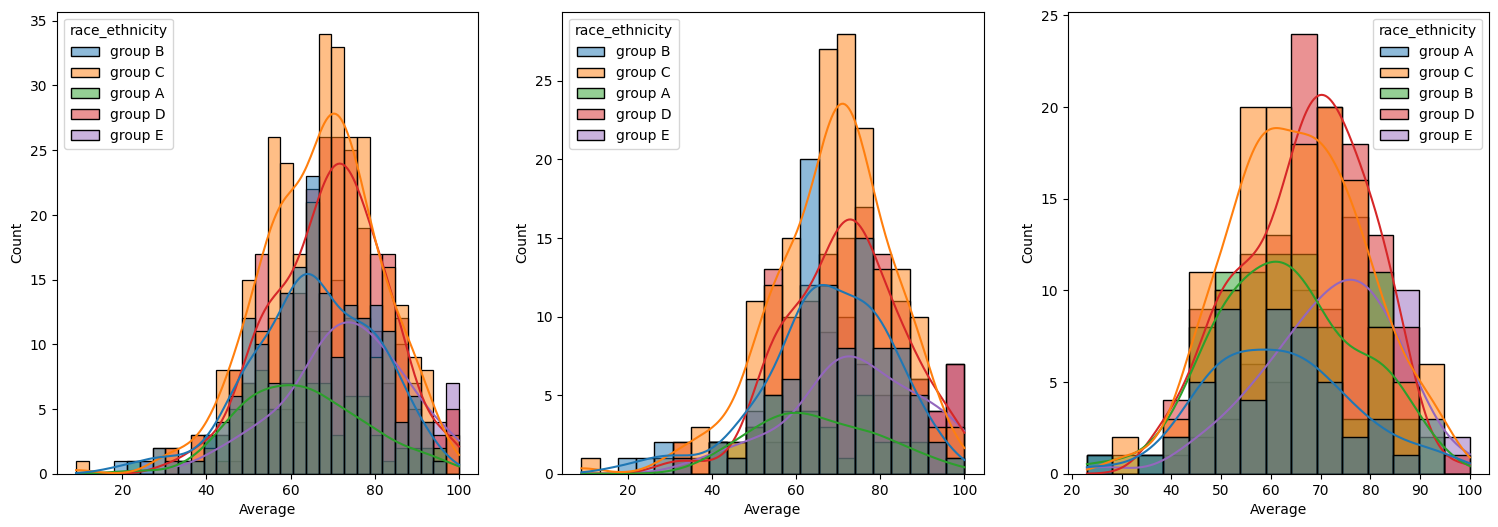

In [96]:
fig, ax = plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data=df, x='Average', bins=30, kde=True,  hue="race_ethnicity")
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'female'], x='Average', kde=True, hue='race_ethnicity')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'male'], x='Average', kde=True, hue='race_ethnicity')
plt.show()

#### Race group A and B tends to perform poorly in exam

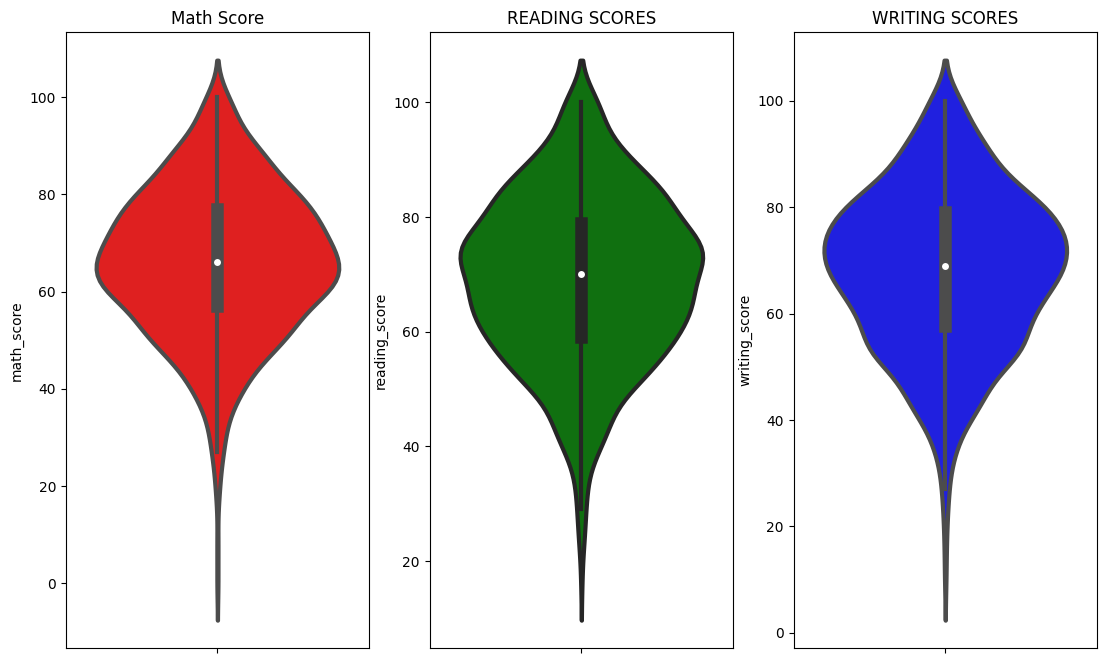

In [106]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("Math Score")
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)
plt.show()

##### 4.3 Multivariate analysis using pieplot

In [114]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


(-1.25, 1.25, -1.25, 1.25)

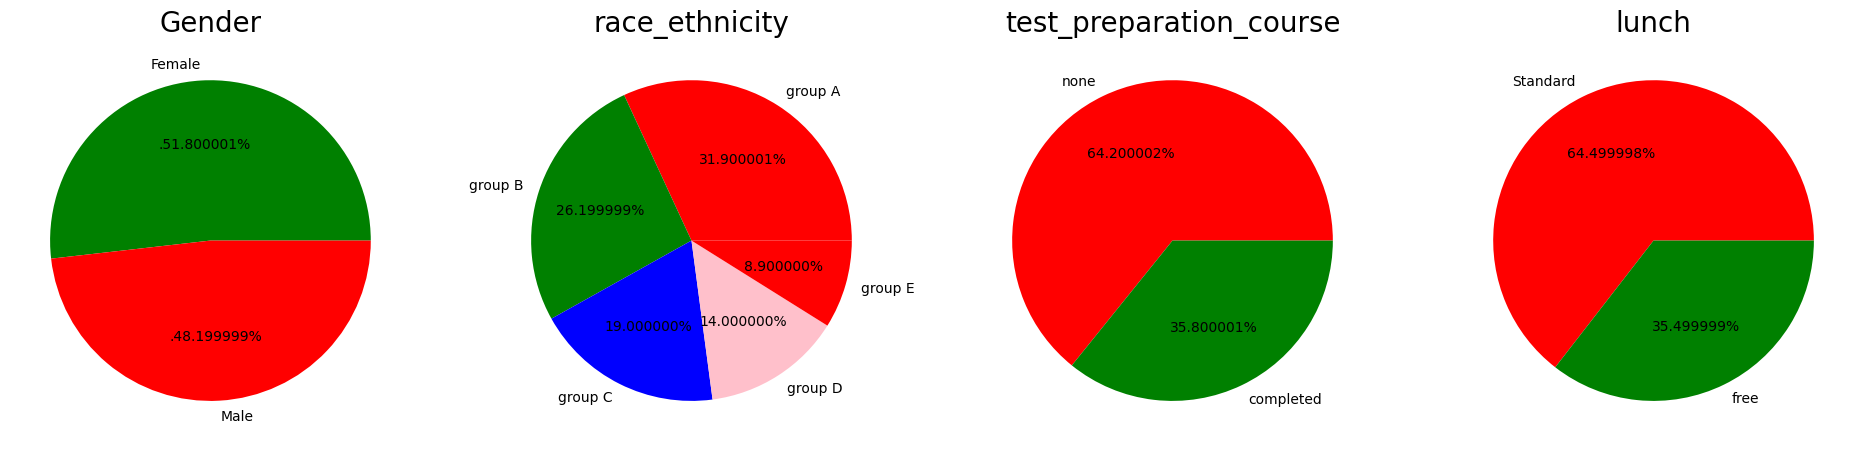

In [128]:
plt.rcParams['figure.figsize'] = (30,10)
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels='Female', 'Male'
color = ['green', 'red']
plt.pie(size, colors = color, labels = labels,autopct='.%2f%%')
plt.title('Gender', fontsize = 20)

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'group A', 'group B', 'group C', 'group D', 'group E'
color = ['red', 'green', 'blue', 'pink']
plt.pie(size, colors = color, labels = labels, autopct='%2f%%')
plt.title('race_ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['test_preparation_course'].value_counts()
labels = 'none', 'completed'
color = ['red', 'green']
plt.pie(size, colors = color, labels = labels, autopct='%2f%%')
plt.title('test_preparation_course', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['lunch'].value_counts()
labels = 'Standard', 'free'
color = ['red', 'green']
plt.pie(size, colors = color, labels = labels, autopct='%2f%%')
plt.title('lunch', fontsize = 20)
plt.axis('off')

### Observation
##### Number of male and female are almost equal
##### number of students are greatest in group A
##### Number of students who have not enrolled in any test preparation course is greatest
##### Number of students who have Standard lunch is greater

### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
##### How is distribution of Gender ?
##### Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

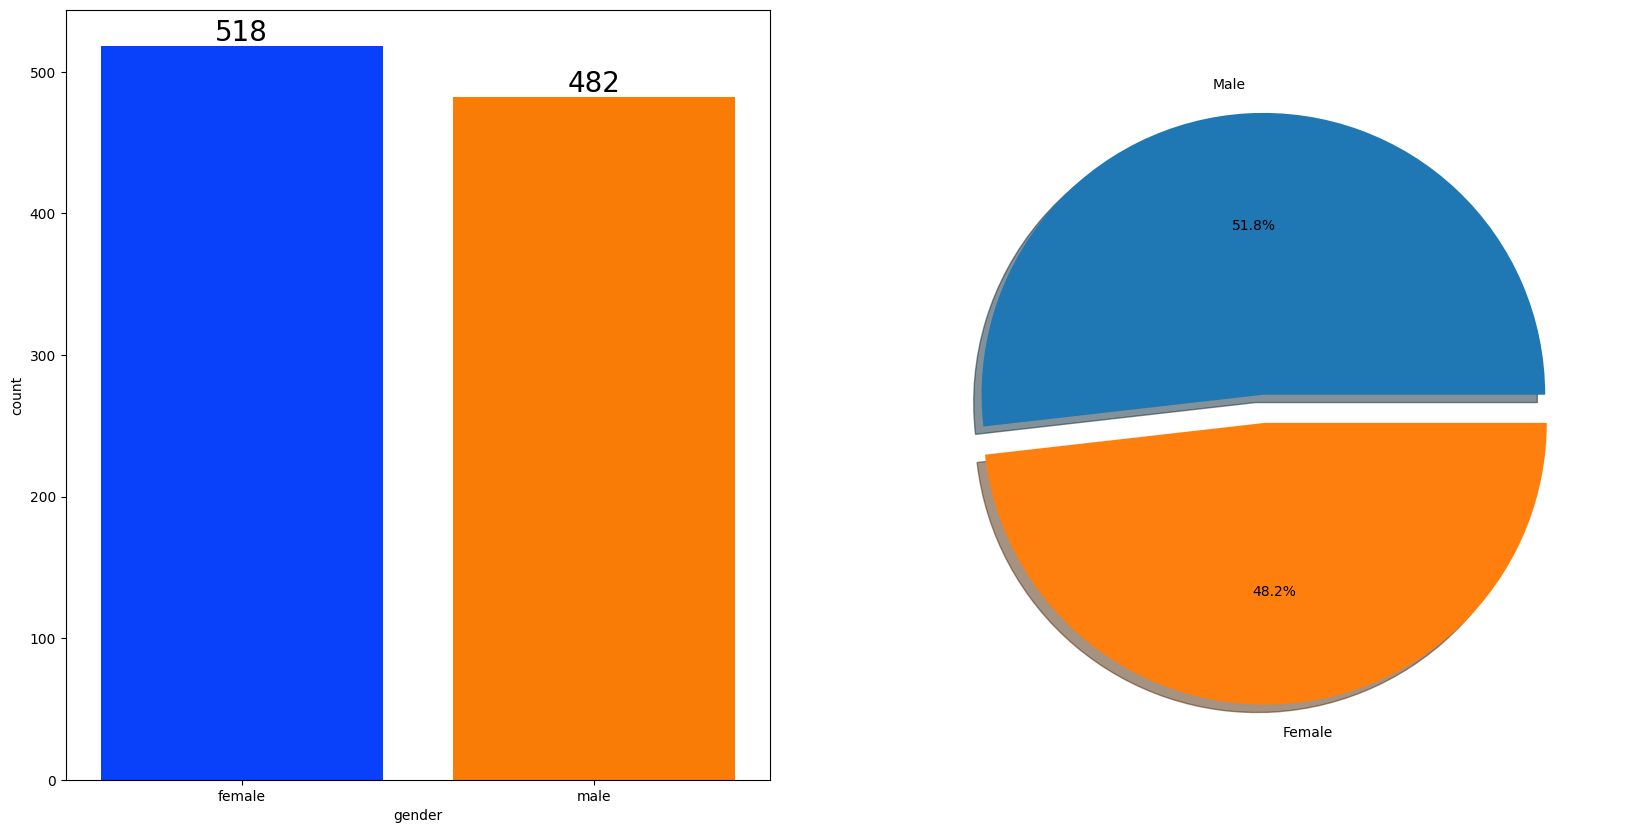

In [137]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
plt.pie(df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0,0.1], autopct='%1.1f%%', shadow=True)
plt.show()

#### Insights
##### Gender have balanced data with female students are 518(48.2%) and male students are 482(51.8%)

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [151]:
gender_group = df.groupby('gender').sum()
gender_group

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average
gender,,,,,,,,,
female,group Bgroup Cgroup Bgroup Bgroup Bgroup Bgrou...,bachelor's degreesome collegemaster's degreeas...,standardstandardstandardstandardstandardfree/r...,nonecompletednonenonecompletednonenonenonenone...,32962,37611,37538,108111,36037.000000
male,group Agroup Cgroup Bgroup Dgroup Cgroup Dgrou...,associate's degreesome collegesome collegehigh...,free/reducedstandardfree/reducedfree/reducedst...,nonenonenonecompletednonenonecompletednonecomp...,33127,31558,30516,95201,31733.666667


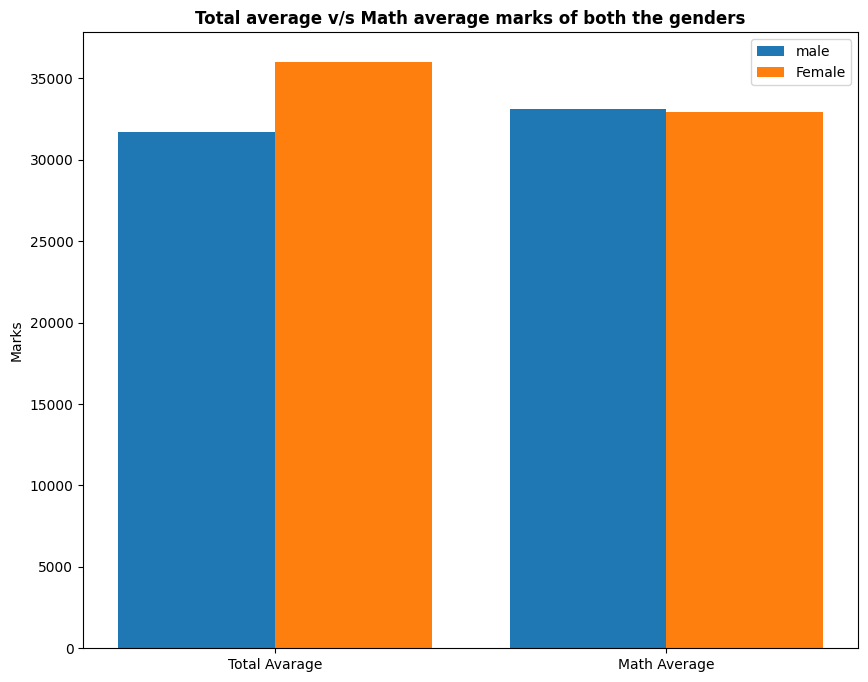

In [154]:
plt.figure(figsize=(10,8))
X = ['Total Avarage', 'Math Average']

female_score = gender_group['Average'][0], gender_group['math_score'][0]
male_score = gender_group['Average'][1], gender_group['math_score'][1]
X_axis = np.arange(len(X))

plt.bar(X_axis-0.2, male_score, 0.4, label='male')
plt.bar(X_axis + 0.2, female_score, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### On an average Female have a better overall score then men
#### men have a better score in math

#### 4.4.2 RACE/EHNICITY COLUMN
##### How is Group wise distribution ?
##### Is Race/Ehnicity has any impact on student's performance ?

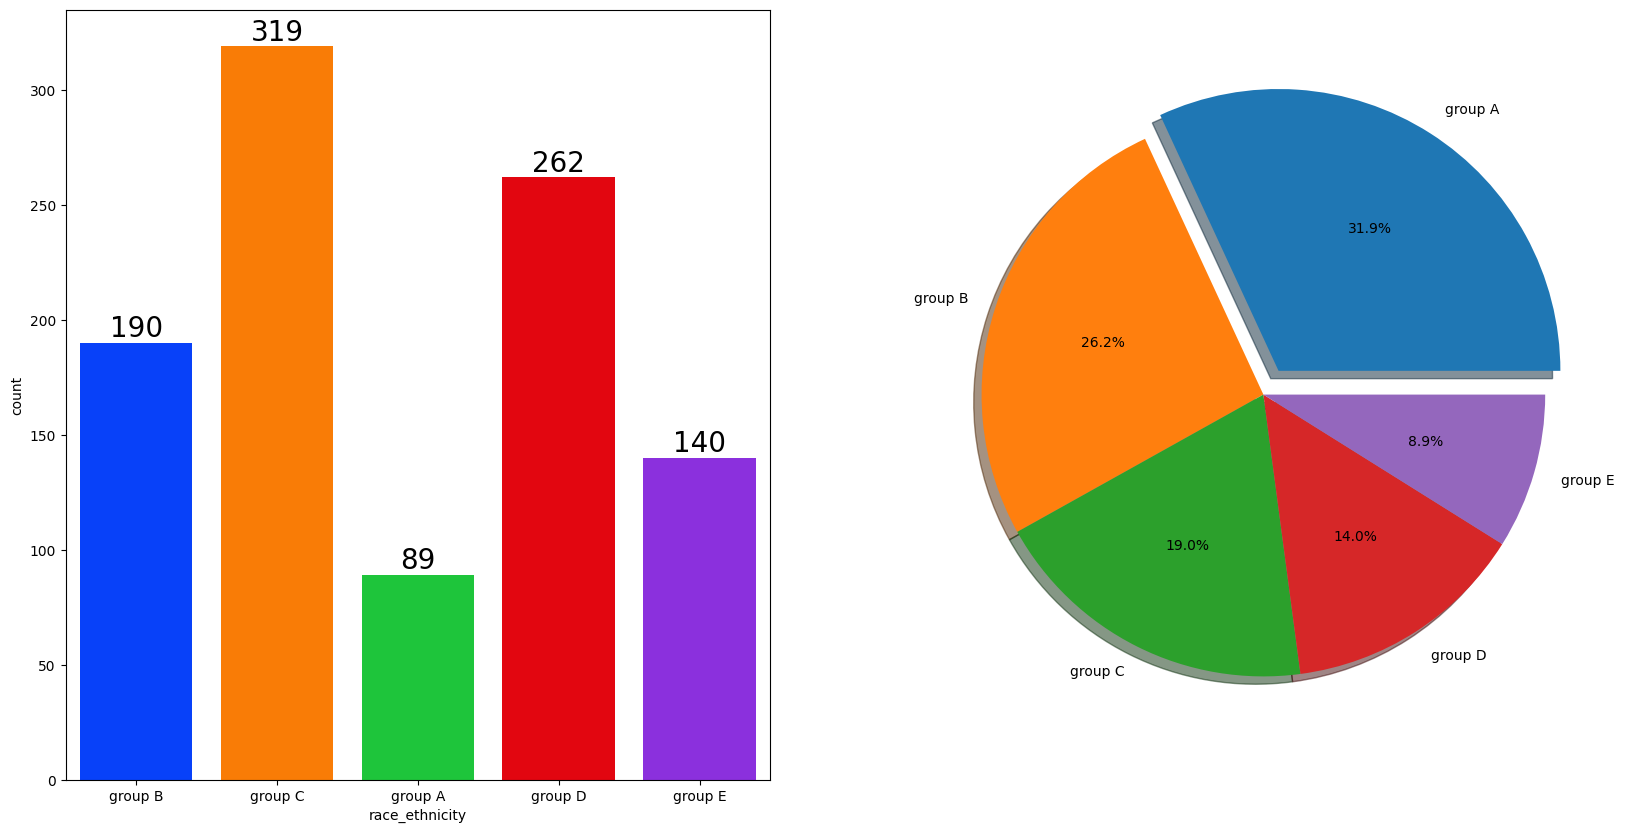

In [156]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
plt.pie(df['race_ethnicity'].value_counts(), labels=['group A', 'group B', 'group C', 'group D', 'group E'], explode=[0.1,0,0,0,0], autopct='%1.1f%%', shadow=True)
plt.show()

##### Most number of students belonging from group C and group D
##### Lowest number of student belonging to group A

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

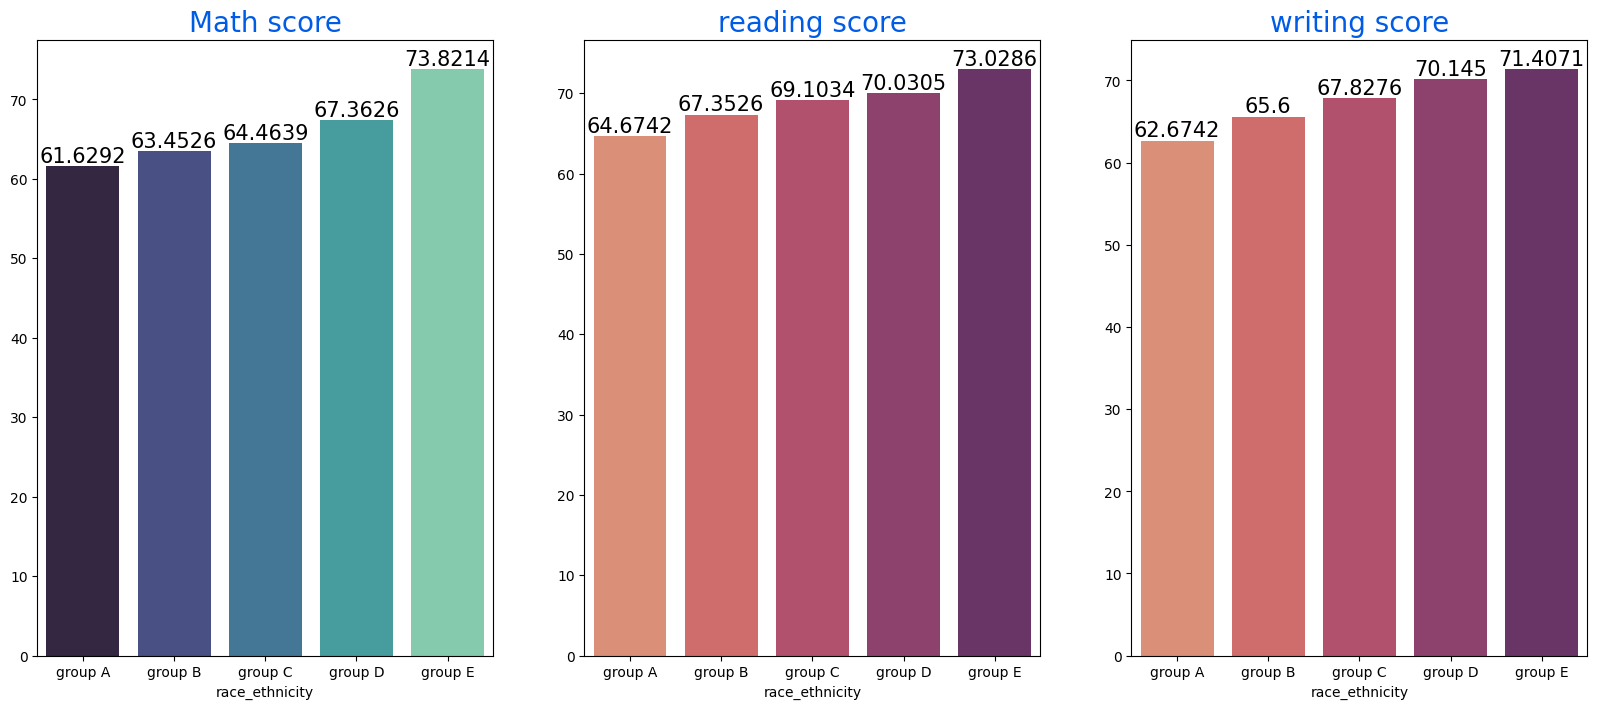

In [175]:
group_race_Ehnicity = df.groupby('race_ethnicity')
f, ax = plt.subplots(1, 3, figsize=(20,8))

sns.barplot(x=group_race_Ehnicity['math_score'].mean().index, y = group_race_Ehnicity['math_score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=group_race_Ehnicity['reading_score'].mean().index, y = group_race_Ehnicity['reading_score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)
    
sns.barplot(x=group_race_Ehnicity['writing_score'].mean().index, y = group_race_Ehnicity['writing_score'].mean().values, palette='flare', ax=ax[2])
ax[2].set_title('writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

#### Insights
##### Group E have scored the highest marks
##### Group A have scored the lowest marks
##### Students who have lower economic status have lower average in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
##### What is educational background of student's parent ?
##### Is parental education has any impact on student's performance ?

In [182]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [183]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette='Blues')
plt.title("Conparision of parental education", fontweight='bold', fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

ValueError: could not convert string to float: "bachelor's degree"